# Lending Club Case Study - Exploratory Data Analysis

## Business Understanding

    Lending club  is the largest online loan marketplace where Borrowers can easily access loans. The company wants to understand the driving factors behind loan default, i.e. the variables which are strong indicators of default.  The company  can utilize this knowledge for its portfolio and risk assessment.

## Problem Statement


    Borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'.So,  identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss.


In [2]:
# Import the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read the data into a dataframe
data = pd.read_csv("loan.csv",low_memory=False)

In [4]:
#Information about the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [5]:
#Displaying all the columns
pd.set_option("display.max_columns", None)

In [6]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

# Data Cleaning 

In [7]:
# Dropping the columns with more than 30% of NULL values

df_null = data[[column for column in data if data[column].count() / len(data) >= 0.3]]

print("List of dropped columns:", end=" ")
for c in data.columns:
    if c not in df_null.columns:
        print(c, end=", ")
               
print('\n')

data = df_null

List of dropped columns: mths_since_last_record, next_pymnt_d, mths_since_last_major_derog, annual_inc_joint, dti_joint, verification_status_joint, tot_coll_amt, tot_cur_bal, open_acc_6m, open_il_6m, open_il_12m, open_il_24m, mths_since_rcnt_il, total_bal_il, il_util, open_rv_12m, open_rv_24m, max_bal_bc, all_util, total_rev_hi_lim, inq_fi, total_cu_tl, inq_last_12m, acc_open_past_24mths, avg_cur_bal, bc_open_to_buy, bc_util, mo_sin_old_il_acct, mo_sin_old_rev_tl_op, mo_sin_rcnt_rev_tl_op, mo_sin_rcnt_tl, mort_acc, mths_since_recent_bc, mths_since_recent_bc_dlq, mths_since_recent_inq, mths_since_recent_revol_delinq, num_accts_ever_120_pd, num_actv_bc_tl, num_actv_rev_tl, num_bc_sats, num_bc_tl, num_il_tl, num_op_rev_tl, num_rev_accts, num_rev_tl_bal_gt_0, num_sats, num_tl_120dpd_2m, num_tl_30dpd, num_tl_90g_dpd_24m, num_tl_op_past_12m, pct_tl_nvr_dlq, percent_bc_gt_75, tot_hi_cred_lim, total_bal_ex_mort, total_bc_limit, total_il_high_credit_limit, 



Total 56 Columns are dropped which clearly shows it has more than 30% of NULL values. Removing these columns won't affect further analysis.

In [8]:
#displaying shape of the dataframe after cleaning

data.shape

(39717, 55)

After removing 30% of Null values and it clearly shows that remaining 55 columns are present in the dataset.

In [9]:
#Checking any duplicate values present in the dateframe

data.duplicated().value_counts()

False    39717
dtype: int64

There is no duplicate data present in the dataframe.

Let analyse missing values on the remaining 54 columns 

In [10]:
#From column 25 to 53 are also not required for analysis
data.drop(data.iloc[:, 25:53], inplace = True, axis = 1)


Most of the columns has the values either '0' or 'NAN'. some of the columns having same values. So, From column 25 to column 52 are not required for futher analysis.

In [11]:
data['tax_liens'].unique()

array([ 0., nan])

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    39717 non-null  int64  
 1   member_id             39717 non-null  int64  
 2   loan_amnt             39717 non-null  int64  
 3   funded_amnt           39717 non-null  int64  
 4   funded_amnt_inv       39717 non-null  float64
 5   term                  39717 non-null  object 
 6   int_rate              39717 non-null  object 
 7   installment           39717 non-null  float64
 8   grade                 39717 non-null  object 
 9   sub_grade             39717 non-null  object 
 10  emp_title             37258 non-null  object 
 11  emp_length            38642 non-null  object 
 12  home_ownership        39717 non-null  object 
 13  annual_inc            39717 non-null  float64
 14  verification_status   39717 non-null  object 
 15  issue_d            

These Columns - Id, Member_Id, url, desc,pymnt_plan, Zip_code, addr_state,tax_liens,Employee_title and title are not very useful for data analysis.Let's drop these records. 

In [13]:
data.drop(data.iloc[:, [0,1,10,17,18,19,21,22,23,26]], inplace = True, axis = 1)


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   funded_amnt           39717 non-null  int64  
 2   funded_amnt_inv       39717 non-null  float64
 3   term                  39717 non-null  object 
 4   int_rate              39717 non-null  object 
 5   installment           39717 non-null  float64
 6   grade                 39717 non-null  object 
 7   sub_grade             39717 non-null  object 
 8   emp_length            38642 non-null  object 
 9   home_ownership        39717 non-null  object 
 10  annual_inc            39717 non-null  float64
 11  verification_status   39717 non-null  object 
 12  issue_d               39717 non-null  object 
 13  loan_status           39717 non-null  object 
 14  purpose               39717 non-null  object 
 15  dti                

After Dropping missing and unique values records. Remaining 17 columns are present and let's start analysing these records. 

## Interest Rate

In [15]:
# "%" present in the interest rate and it is object type. Before removing % in Interest Rate.
data['int_rate']

0        10.65%
1        15.27%
2        15.96%
3        13.49%
4        12.69%
          ...  
39712     8.07%
39713    10.28%
39714     8.07%
39715     7.43%
39716    13.75%
Name: int_rate, Length: 39717, dtype: object

In [16]:
# Removing % from the Interest rate and changing datatype from Object to Float for analysis
data['int_rate']=data['int_rate'].str.replace("%","").astype("float64")

In [17]:
# After Removing % in Interest rate
data['int_rate']

0        10.65
1        15.27
2        15.96
3        13.49
4        12.69
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 39717, dtype: float64

## Term

In [18]:
# Removing Months from term column and change into Integer type
data['term']=data['term'].str.replace(" months","").astype('int64')

## Employee Length

In Emp-Length column, replacing "10+ years" to "10" and "< 1 year" to "0.5". 

In [19]:
data['emp_length']=data['emp_length'].str.replace("< 1","0.5").str.rstrip('+ years')


In [20]:
# Finding null Values in emp_length column.
data['emp_length'].isnull().sum()

1075

In [21]:
#Emp_length is required for analysis, Instead of removing the records, Fill '0' in the missing values.
data['emp_length'].fillna('0',inplace=True)

In [22]:
# After adding null values and change the datatype from Object to Float
data['emp_length'] =data['emp_length'].astype('float64')

In [23]:
data['pub_rec_bankruptcies'].isnull().sum()

697

Total 697 records have null values and filling "0" to those 697 values and change the datatype to Integer.

In [24]:
data['pub_rec_bankruptcies'].fillna('0',inplace=True)
data['pub_rec_bankruptcies']=data['pub_rec_bankruptcies'].astype('int64')

Checking is there any NULL values present in the dataframe. After cleaning and adding the missing values, it clearly shows that no NULL values present.

In [25]:
# After adding the missing values, No Null values are present in the Dataframe.
data.isnull().sum()

loan_amnt               0
funded_amnt             0
funded_amnt_inv         0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
pub_rec_bankruptcies    0
dtype: int64

## Loan Status

In [26]:
data['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

After analysing the loan status column, we need only Fully paid and Charged Off loans. So we decided not to consider the "Current" loan.

After removing "Current" loan from the dataframe, Create a Final dataframe for further analysing. 

In [27]:
data_loan = data[~(data['loan_status']=='Current')]
data_loan.shape

(38577, 17)

# Univariate Analysis

### Loan Amount

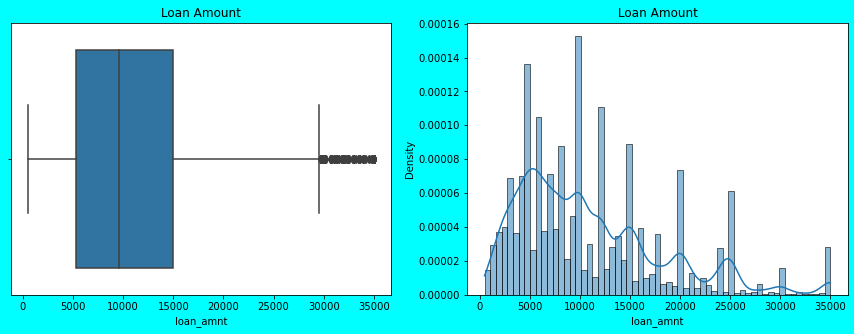

In [28]:
#Plotting and subplot for Loan Amount 
plt.figure(figsize=[15,5],facecolor='cyan')
plt.subplot(1,2,1)
sns.boxplot(x=data_loan['loan_amnt']).set_title("Loan Amount")

plt.subplot(1,2,2)
sns.histplot(data_loan['loan_amnt'],kde=True,stat='density').set_title("Loan Amount")
plt.show()

The loan amount varied from 0 to 35000 and the mean is 9600.

In [29]:
data_loan['loan_amnt'].describe()

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

### Annual Income

Text(0.5, 1.0, 'Annual Income before outliers')

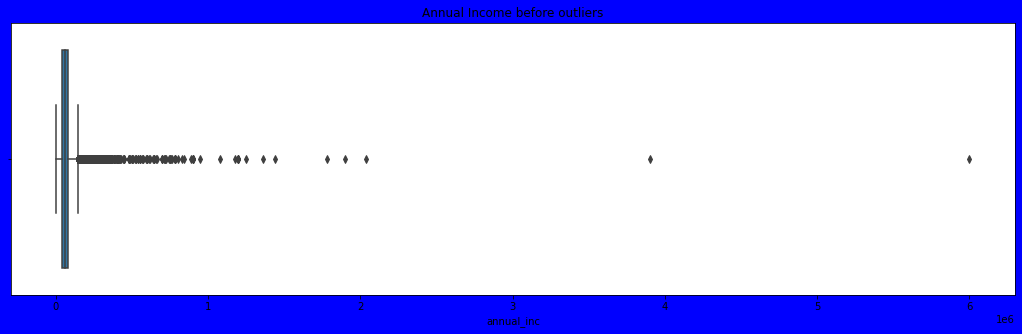

In [30]:
plt.figure(figsize=[18,5],facecolor='b')
sns.boxplot(x=data_loan['annual_inc']).set_title("Annual Income before outliers")

Outliers are present in the annual_inc columns as shown in above. Before analysing, remove the outliers. 

In [31]:
data_loan['annual_inc'].describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

# Removing Outliers

In [32]:
data_outlier=data_loan[data_loan['annual_inc'] < data_loan['annual_inc'].quantile(0.99)]

Removing 1% of outliers from the variable 'annual_inc' since,outliers will make results inaccurate

In [33]:
#Check the descirbe function after removing outliers
data_outlier['annual_inc'].describe()

count     38191.000000
mean      65313.610090
std       35150.773045
min        4000.000000
25%       40000.000000
50%       58000.000000
75%       80232.000000
max      234000.000000
Name: annual_inc, dtype: float64

In [34]:
#Checking shape of dataframe
data_outlier.shape

(38191, 17)

Text(0.5, 1.0, 'Annual Income after removing Outliers')

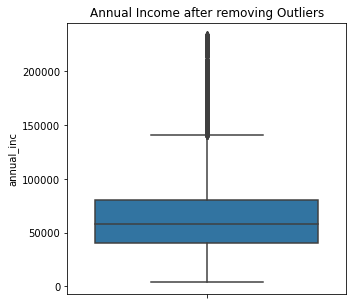

In [35]:
#Plot boxplot to check how it is after removing outliers
plt.figure(figsize=[5,5])
sns.boxplot(y=data_outlier['annual_inc']).set_title('Annual Income after removing Outliers')


Since,it is 200000 this is an acceptable income we can keep and continue the analysis

C:\Users\Gopu42\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Annual Income')

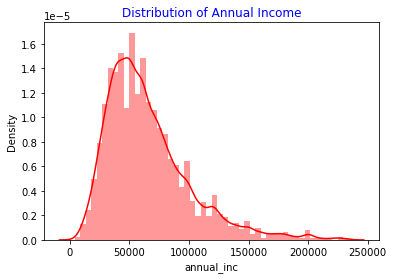

In [36]:
sns.distplot(data_outlier['annual_inc'],color='r',bins=50).set_title('Distribution of Annual Income',color='b')

By analysing distribution of Annual income of borrowers it seems that most of borrowers income range from 25000 to 75000

C:\Users\Gopu42\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Loan Amount')

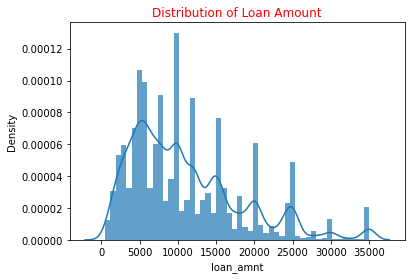

In [37]:
sns.distplot(data_outlier['loan_amnt'],bins=50,hist_kws={'alpha': 0.7}).set_title('Distribution of Loan Amount',color='r')

By analysing distribution of loan amount at every round off value (i.e 5000,10000,15000,20000,...) more number of loan are given. Similarly (7500,12500,17500,..) small peak appers.Most of loan amount given range from 5000 to 15000

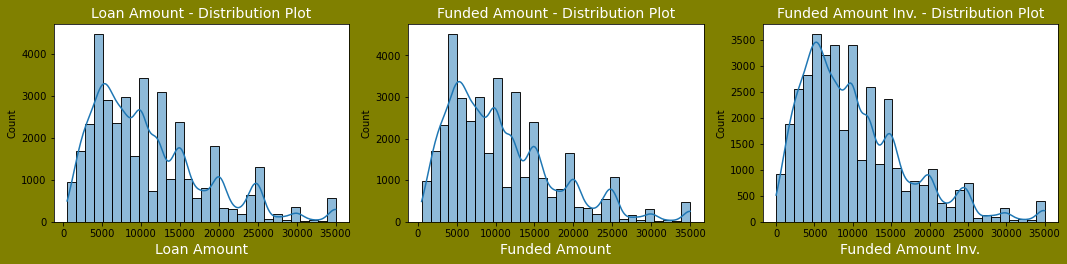

In [38]:
#Setting figure size
plt.figure(figsize=(18,8),facecolor='olive')

# subplot 1
plt.subplot(2, 3, 1)
ax = sns.histplot(data_outlier['loan_amnt'],bins=30,kde=True)
ax.set_title('Loan Amount - Distribution Plot',fontsize=14,color='w')
ax.set_xlabel('Loan Amount',fontsize=14,color='w')

# subplot 2
plt.subplot(2, 3, 2)
ax = sns.histplot(data_outlier['funded_amnt'],bins = 30,kde=True)
ax.set_title('Funded Amount - Distribution Plot',fontsize=14,color='w')
ax.set_xlabel('Funded Amount',fontsize=14,color='w')

# subplot 3
plt.subplot(2, 3, 3)
ax = sns.histplot(data_outlier['funded_amnt_inv'],bins = 30,kde=True)
ax.set_title('Funded Amount Inv. - Distribution Plot',fontsize=14,color='w')
ax.set_xlabel('Funded Amount Inv.',fontsize=14,color='w')
plt.show()

By comparing distribution of loan amount,Funded amount,Funded amount Inv. we see that distributions are similar so we can use Loan Amount only for further analysis.

### Employee Experience

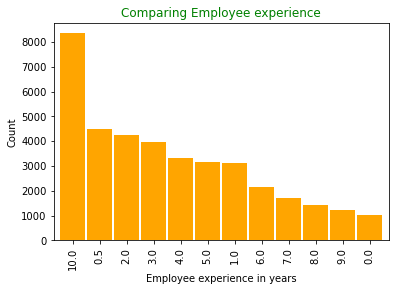

In [39]:
#Plotting bar chart for Employee experience
data_outlier['emp_length'].value_counts().plot(kind='bar',color ='orange',width = 0.9)
 
plt.xlabel("Employee experience in years")
plt.ylabel("Count")
plt.title("Comparing Employee experience",color='g')
plt.show()

Majority of employees applying for the loan have more than 10 years of experience

### Interest Rate

C:\Users\Gopu42\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Interest Rate')

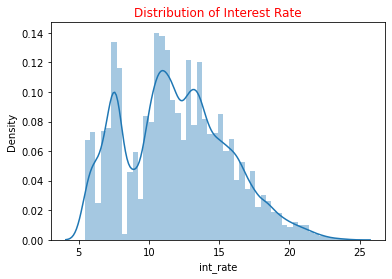

In [40]:
sns.distplot(data_outlier['int_rate'],bins=50).set_title('Distribution of Interest Rate',color='r')

Most of loans are given with interest rate around 11 to 15, 7 to 8

# Univariate Categorical Analysis

### Loan Status

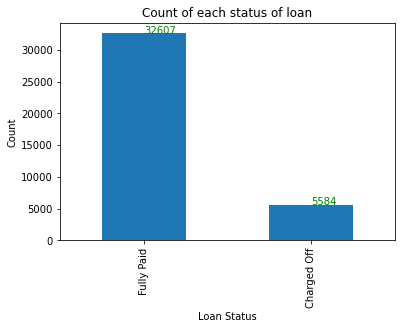

In [41]:
#Plotting bar graph
bar=data_outlier['loan_status'].value_counts().plot.bar()
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.title("Count of each status of loan")

#Adding number of counts of each bar in graph
s=data_outlier['loan_status'].value_counts()
for i, v in s.reset_index().iterrows():
    bar.text(i, v.loan_status + 0.2 , v.loan_status, color='g')

In [42]:
# Finding Charged Off percentage
print("%.2f" % (data_outlier.loc[data_outlier['loan_status'] == 'Charged Off'].loan_status.count() * 100/len(data_outlier)))

14.62


1. Most of the loans are Fully Paid.
2. Around 14% of loan are having status as defaulters or charged off.

### Grade

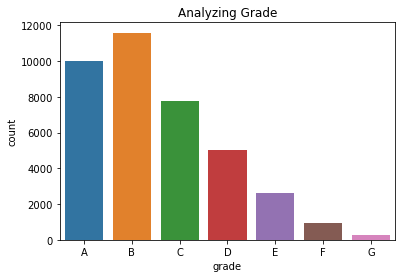

In [43]:
#Analyzing Grade
sns.countplot(x='grade', data=data_outlier,order=sorted(data_outlier.grade.unique())).set_title("Analyzing Grade")
plt.show()

Most of the loans have grade of A and B. Therefore stating most of the loans are high graded loans

# Bivariate Analysis

In [44]:
#displaying dataframe
data_outlier

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,pub_rec_bankruptcies
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10.0,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,27.65,0
1,2500,2500,2500.0,60,15.27,59.83,C,C4,0.5,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,1.00,0
2,2400,2400,2400.0,36,15.96,84.33,C,C5,10.0,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,8.72,0
3,10000,10000,10000.0,36,13.49,339.31,C,C1,10.0,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,20.00,0
5,5000,5000,5000.0,36,7.90,156.46,A,A4,3.0,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,11.20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,2500,1075.0,36,8.07,78.42,A,A4,4.0,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,home_improvement,11.33,0
39713,8500,8500,875.0,36,10.28,275.38,C,C1,3.0,RENT,18000.0,Not Verified,Jul-07,Fully Paid,credit_card,6.40,0
39714,5000,5000,1325.0,36,8.07,156.84,A,A4,0.5,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,debt_consolidation,2.30,0
39715,5000,5000,650.0,36,7.43,155.38,A,A2,0.5,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,other,3.72,0


# Loan amount vs Loan status

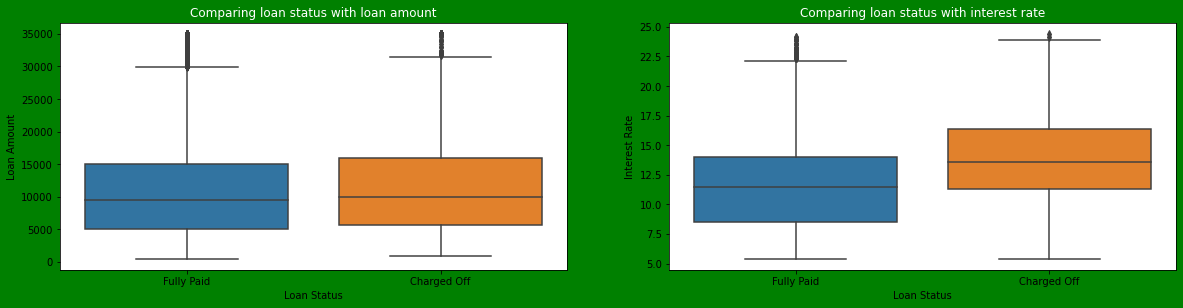

In [45]:
#Assigning figure size
plt.figure(figsize=(20,10),facecolor='g')

# subplot 1
plt.subplot(2,2,1)
sns.boxplot(x='loan_status', y='loan_amnt', data=data_outlier)
plt.title('Comparing loan status with loan amount',color='w')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')

# subplot 2
plt.subplot(2,2,2)
sns.boxplot(x='loan_status', y='int_rate', data=data_outlier)
plt.title('Comparing loan status with interest rate',color='w')
plt.xlabel('Loan Status')
plt.ylabel('Interest Rate')
plt.show()

If the loan amount given increases there is chance of charging off loan

In [46]:
#creating groupby for Loan status and Interest rate
data_outlier.groupby(['loan_status'])['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5584.0,13.808626,3.648676,5.42,11.28,13.57,16.40,24.40
Fully Paid,32607.0,11.594082,3.591723,5.42,8.49,11.49,13.98,24.11


1. Overall, the interest rate varies from 5.42% to 24.4% with average interest rate of 11.8%.
2. The interest rate for Charged Off loans appear to be higher than for Fully paid. As, the risk increases the rate of interest imposed on the loan also increases.

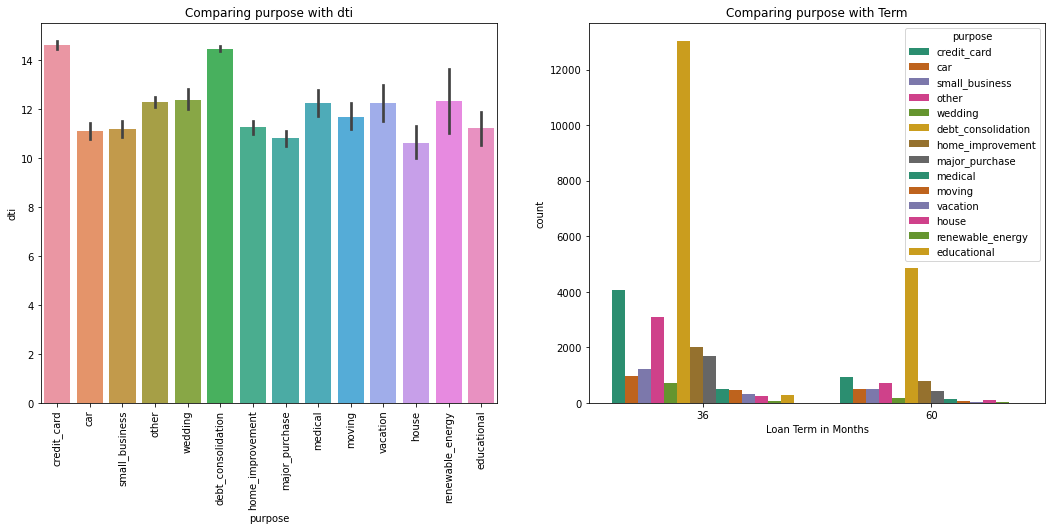

In [47]:
#Draw bar graph for purpose and dti
plt.figure(figsize=(18,7))
plt.subplot(1,2,1)
sns.barplot(y=data_outlier['dti'], x=data_outlier['purpose'])
plt.title("Comparing purpose with dti")
plt.xticks(rotation=90) #for clear visible for caterogiers of x values

plt.subplot(1,2,2)
# draw countplot for purpose and term
sns.countplot( x='term', hue='purpose', data=data_outlier,palette='Dark2').set_title("Comparing purpose with Term")
plt.xlabel('Loan Term in Months')
plt.show()

1. Debt Consolidation has more defaulters in 36 months period.

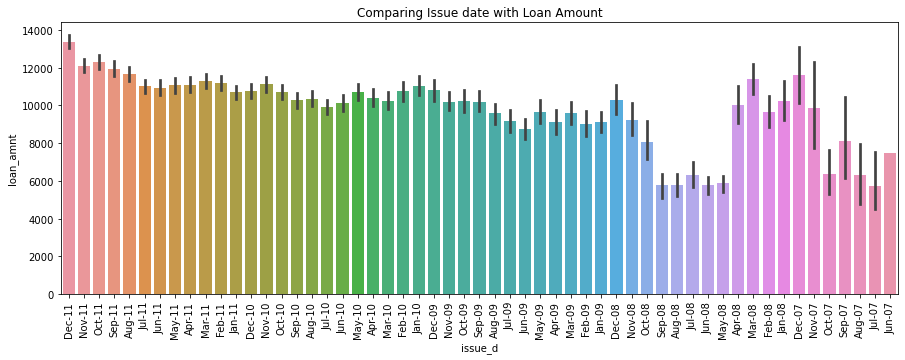

In [48]:
#plotting barplot for issue date and loan amount
plt.figure(figsize=(15,5))
sns.barplot(x=data_outlier['issue_d'], y=data_outlier['loan_amnt']).set_title('Comparing Issue date with Loan Amount')
plt.xticks(rotation=90)
plt.show()

1. More loans are approved in financial year end.  
2. Comparing with all years on 2011 more number of loan are approved
3. Higher loan amount are given in year 2010 and 2011 when compare to other year

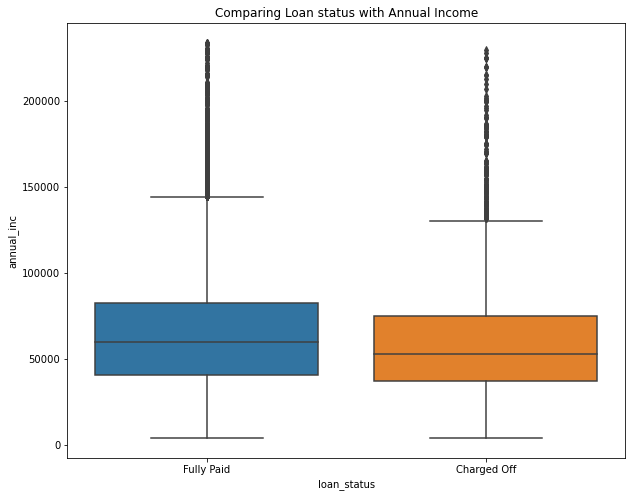

In [49]:
#Plotting barplot for loan status and annual income
plt.figure(figsize=(10,8))
sns.boxplot(x=data_outlier['loan_status'], y=data_outlier['annual_inc']).set_title("Comparing Loan status with Annual Income")
plt.show()

People with higher annual income paid loan succesfully

<AxesSubplot:xlabel='verification_status', ylabel='loan_amnt'>

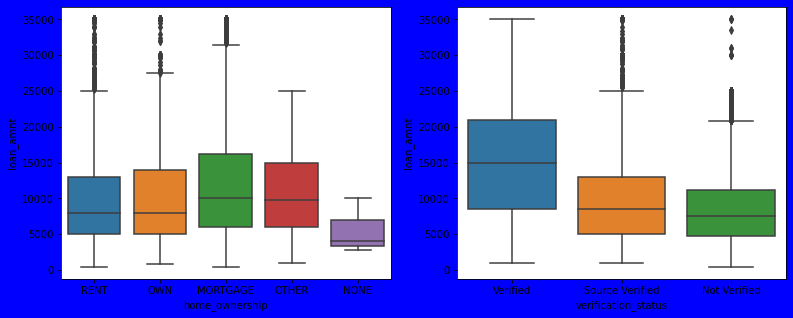

In [50]:
#Changing figure size
plt.figure(figsize=(13,5),facecolor='b')

#Subplot 1
plt.subplot(1,2,1)
sns.boxplot(x=data_outlier['home_ownership'], y=data_outlier['loan_amnt'])

#Subplot2
plt.subplot(1,2,2)
sns.boxplot(x=data_outlier['verification_status'], y=data_outlier['loan_amnt'])

1. For verified persons loan amount is given higher.  
2. For not verified persons loan amount is given lesser since charge off is more possible in this category.  
3. People who are in mortgage home ownership bought loan amount higher 

# Derived Column

In [51]:
#Cutting interest rate into smaller bins
data_outlier['int_bin']=pd.cut(data_outlier['int_rate'],24)

<ipython-input-51-13d19d8e309b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_outlier['int_bin']=pd.cut(data_outlier['int_rate'],24)


In [52]:
data_outlier.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38191 entries, 0 to 39716
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   loan_amnt             38191 non-null  int64   
 1   funded_amnt           38191 non-null  int64   
 2   funded_amnt_inv       38191 non-null  float64 
 3   term                  38191 non-null  int64   
 4   int_rate              38191 non-null  float64 
 5   installment           38191 non-null  float64 
 6   grade                 38191 non-null  object  
 7   sub_grade             38191 non-null  object  
 8   emp_length            38191 non-null  float64 
 9   home_ownership        38191 non-null  object  
 10  annual_inc            38191 non-null  float64 
 11  verification_status   38191 non-null  object  
 12  issue_d               38191 non-null  object  
 13  loan_status           38191 non-null  object  
 14  purpose               38191 non-null  object  
 15  dt

# Multivariate Analysis

Text(0, 0.5, 'Loan Amount')

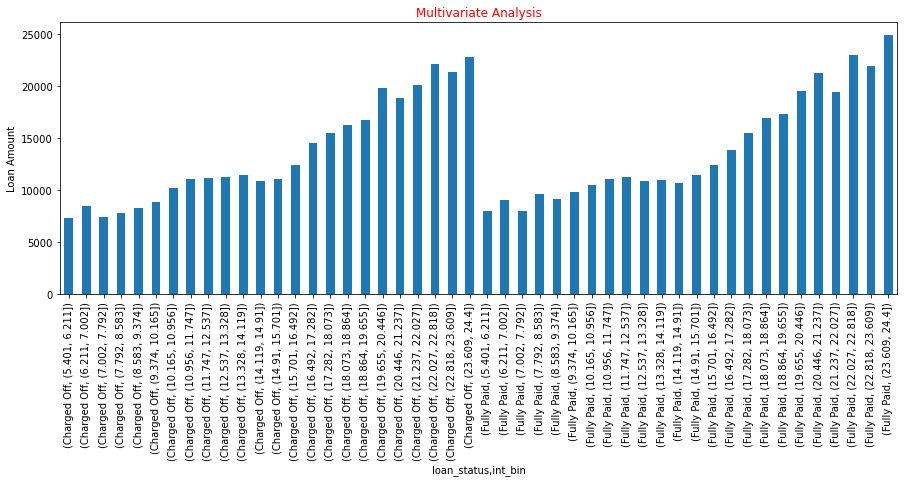

In [53]:
#Groupby values and plot the graph
plt.figure(figsize=[15,5])
data_outlier.groupby(['loan_status','int_bin'])['loan_amnt'].mean().plot(kind='bar')
plt.title('Multivariate Analysis',color='r')
plt.ylabel('Loan Amount')

Depending on Interest rates, charged off also increasing gradually.

Text(0, 0.5, 'Interest Rate')

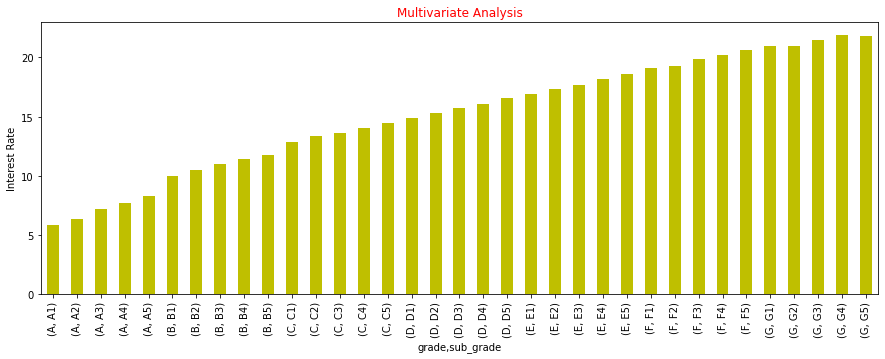

In [54]:
#Groupby with grade and subgrade
plt.figure(figsize=[15,5])
data_outlier.groupby(['grade','sub_grade'])['int_rate'].mean().plot(kind='bar',color='y')
plt.title('Multivariate Analysis',color='r')
plt.ylabel('Interest Rate')


1. If Grade decreases (from A to D), Interest rate of loan increases.
2. If Sub grade increases within grade interest rate increases Ex.A,A1 is lesser than A,A5

Text(0, 0.5, 'Loan Amount')

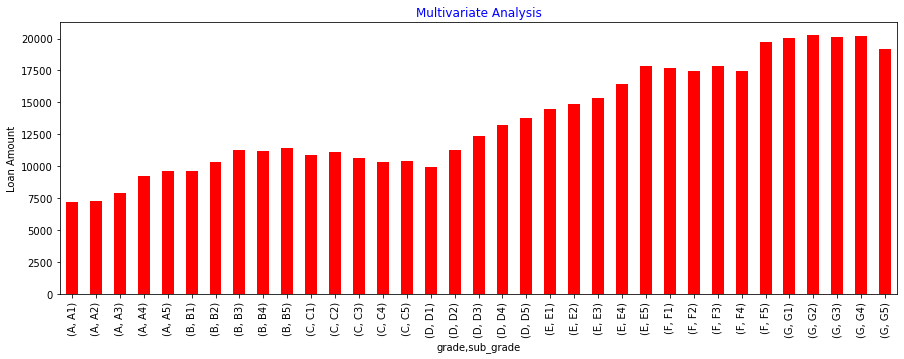

In [55]:
#Groupby with grade and subgrade
plt.figure(figsize=[15,5])
data_outlier.groupby(['grade','sub_grade'])['loan_amnt'].mean().plot(kind='bar',color='r')
plt.title('Multivariate Analysis',color='b')
plt.ylabel('Loan Amount')

1. More loan amount is given for lower grade (F & G).Since lower grade have high interest rate, bank has more profit and high risk.
2. Less loan amount is given for Higher grade(A).Since higher grade have low interest rate, bank has less profit so it is given less

Text(0.5, 1.0, 'Comparing loan amount and issuing date')

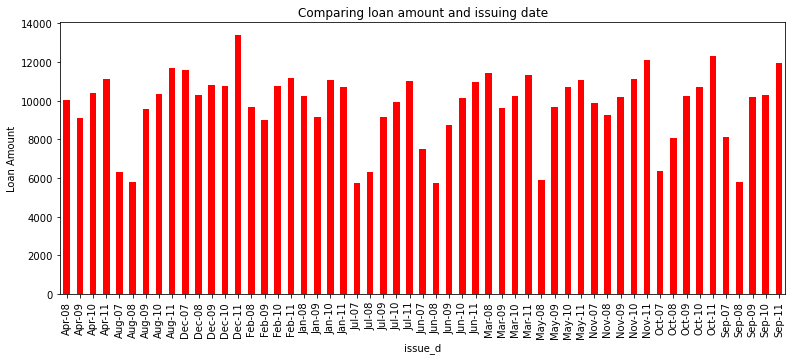

In [56]:
#Groupby issue date 
plt.figure(figsize=(13,5))
data_outlier.groupby(['issue_d'])['loan_amnt'].mean().plot(kind='bar',color='r')
plt.ylabel("Loan Amount")
plt.title("Comparing loan amount and issuing date")

Higher loan amount are given in year 2010 and 2011 when compared to other years

Text(0, 0.5, 'Loan Amount')

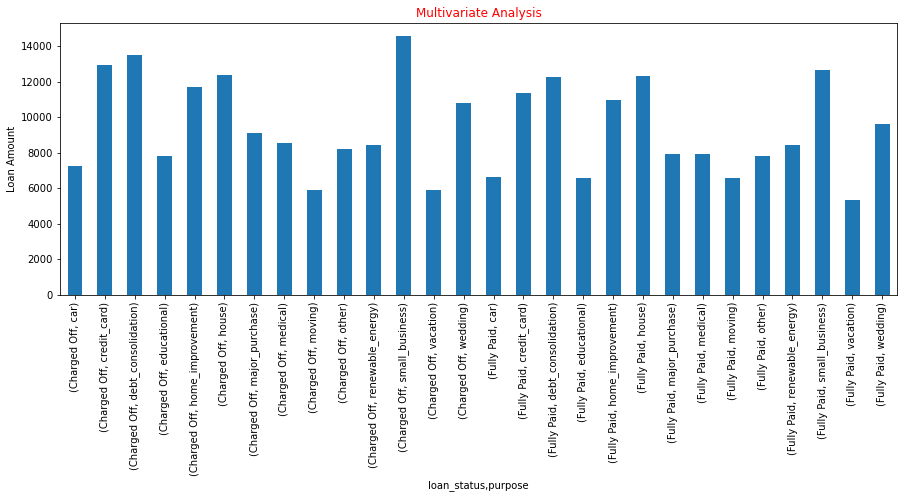

In [57]:
#Groupby purpose
plt.figure(figsize=[15,5])
data_outlier.groupby(['loan_status','purpose'])['loan_amnt'].mean().plot(kind='bar')
plt.title('Multivariate Analysis',color='r')
plt.ylabel('Loan Amount')

1.Charging off is higher in credit card, debt consolidation,small business. So, while giving loan we must be carefull in these categories

Text(0, 0.5, 'Loan Amount')

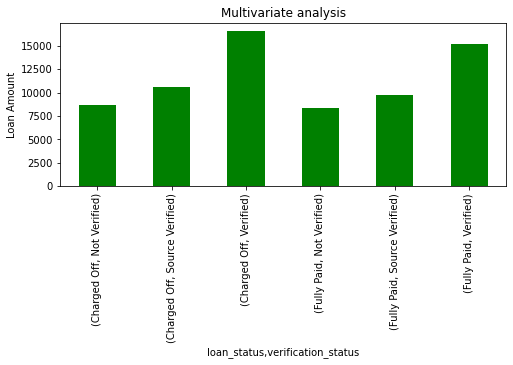

In [58]:
#Groupby loan status and verification status 
plt.figure(figsize=[8,3])
data_outlier.groupby(['loan_status','verification_status'])['loan_amnt'].mean().plot(kind='bar',color='g')
plt.title("Multivariate analysis")
plt.ylabel("Loan Amount")

Even though borrower is verified there is a high chance of charging off We cant simply say only verfiying a person means he/she doesnot charge off.

In [59]:
#Selecting only float and interger variable for numerical analysis
data_numerical = data_outlier.select_dtypes(include = ['float64', 'int64'])
data_numerical.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,pub_rec_bankruptcies
0,5000,5000,4975.0,36,10.65,162.87,10.0,24000.0,27.65,0
1,2500,2500,2500.0,60,15.27,59.83,0.5,30000.0,1.00,0
2,2400,2400,2400.0,36,15.96,84.33,10.0,12252.0,8.72,0
3,10000,10000,10000.0,36,13.49,339.31,10.0,49200.0,20.00,0
5,5000,5000,5000.0,36,7.90,156.46,3.0,36000.0,11.20,0


# Correlation Analysis

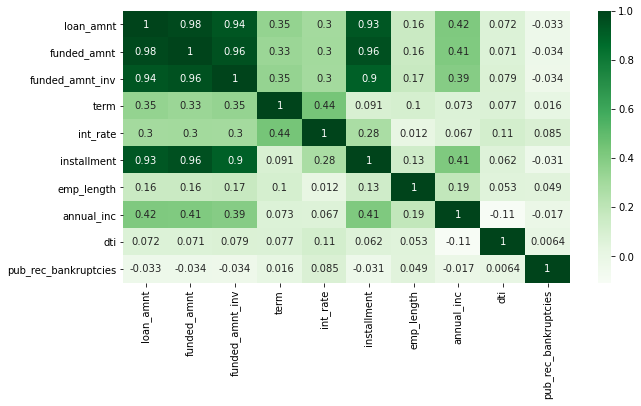

In [60]:
#Finding correlation with all numberiacal variable
data_cor=data_numerical.corr()

plt.figure(figsize=[10,5])
ax=sns.heatmap(data_cor,cmap= 'Greens', annot=True)

1.Number of installment have higher coefficient (0.98) with loan amount which specifies if installement increases loan amount also increases. 

2.Interest rate is correlated to term(.44) so interset rate may vary based on term also.

3.Loan amount is totally un-correlated with public record of bankruptcy. Therefore they represent distinct features.

In [61]:
#Selecting only charged off entries
data_charged_off= data_outlier[~(data_outlier['loan_status']=='Fully Paid')]

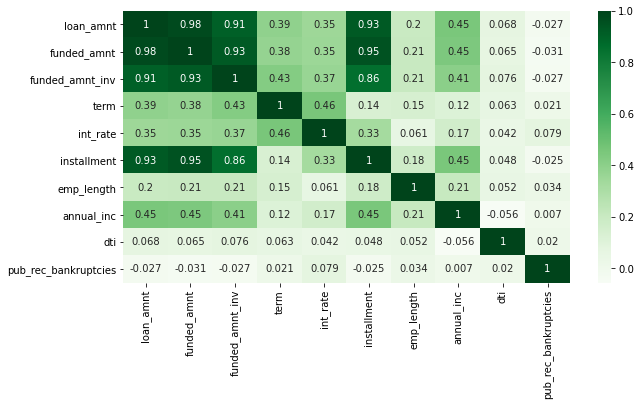

In [62]:
#Finding correlation with all numeriacal variable
data_charged_off_cor = data_charged_off.corr()

plt.figure(figsize=[10,5])
axx= sns.heatmap(data_charged_off_cor,cmap = 'Greens',annot=True)

Only small difference in correlation with comparing above graph

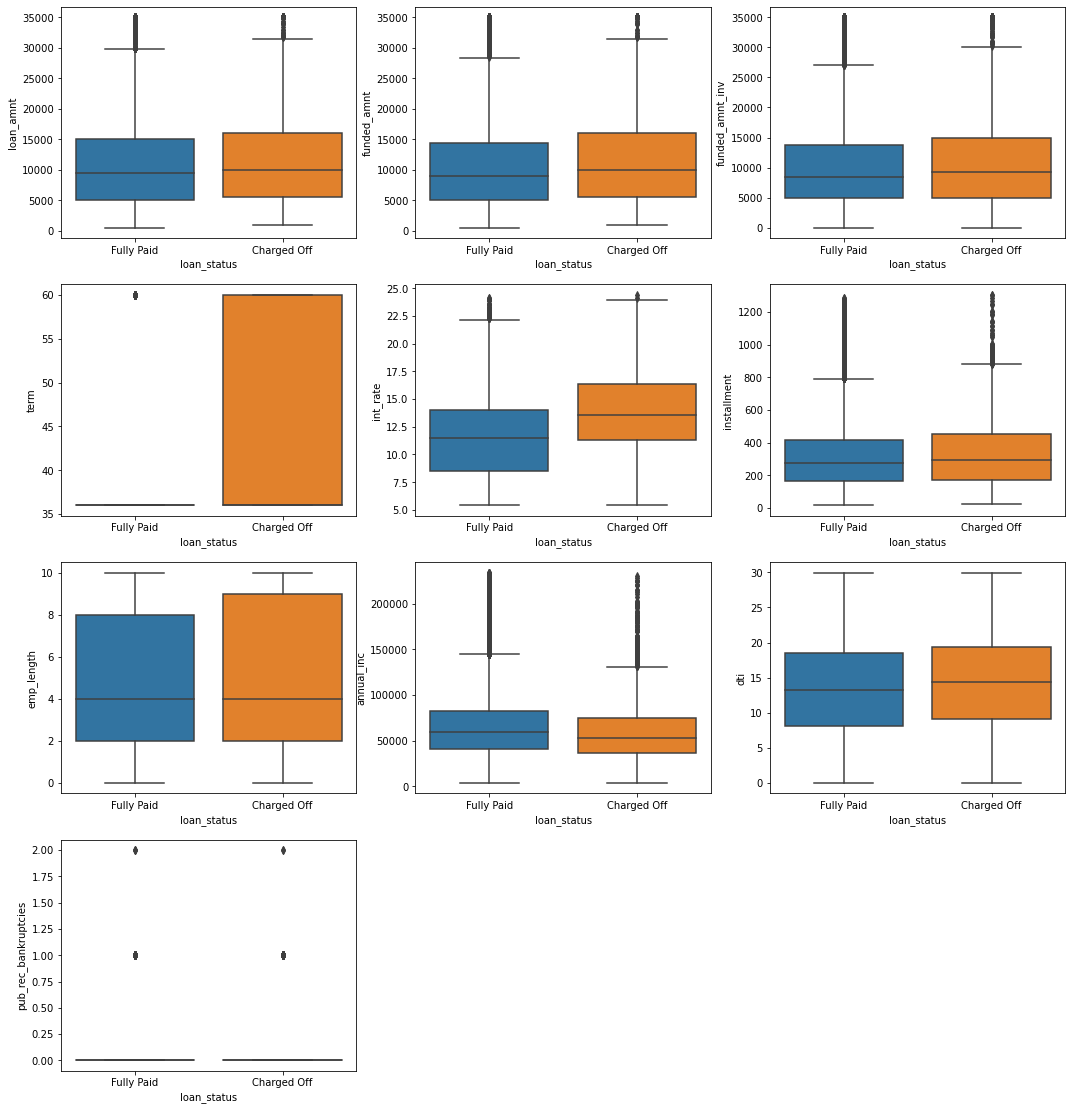

In [63]:
#Plotting boxplot with all variable against loan status
plt.figure(figsize=[18,40])

for i in range(len(data_numerical.columns)):
    plt.subplot(8,3,i+1)
    sns.boxplot(y=data_numerical.columns[i],x='loan_status',data=data_outlier)

plt.show()

1. For higher interest rate charging off is higher. If Interest rate goes high, it has more risk.
2. For higher installment charging off is more
3. Charging off is higher in experienced people
4. People with higher annual income paid loan successfully
5. Public record of bankruptcy does not affect loan status

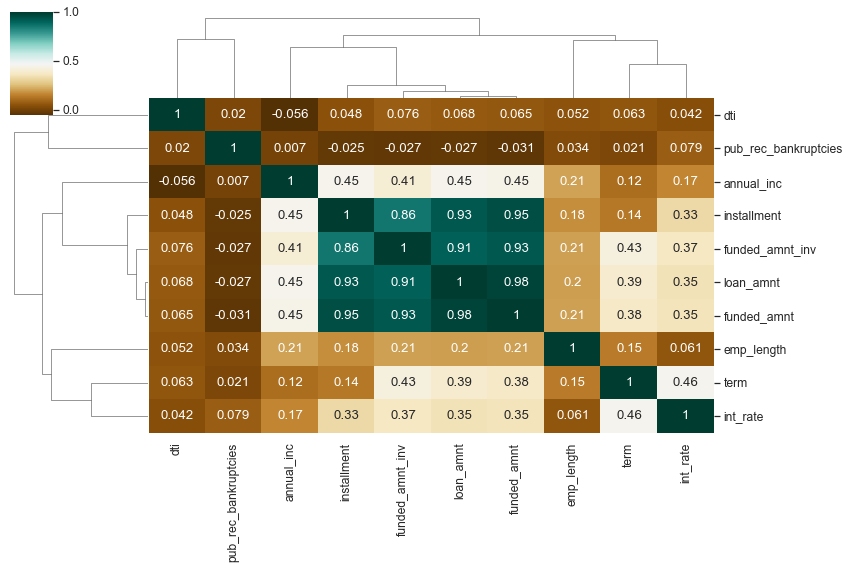

In [64]:
#Creating a cluster map
sns.set(font_scale=1.1)
sns.clustermap(data_charged_off_cor,annot=True,figsize=(12,8),cmap="BrBG")
plt.show()

1. Annual income and DTI are negatively correlated. When annual income is low, DTI is high and vice versa.
2. Loan amount and Bankruptcies are negatively correlated.
3. Employee Length and annual income are postively correlated.
    

# Suggestions

1. As Loan amount increases defaulters increases. Study the customer thoroughly while approving higher loan amount. 
2. Extra focus is needed while approving loan to small business, debt       consolidation . Since there is more charging off in those purposes.
3. Even though borrower is verified there is a chance of charging off. Only with verification status loan shouldn't be an approved.
4. Low grade have high tendency to charge off for that reason high interest rate is given. This assumption work well here.
